In [44]:
# packages

import importlib_resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from itertools import combinations
import xlrd
from matplotlib.patches import Ellipse

import os
os.chdir(os.path.abspath(''))

In [27]:
filename = 'Raisin_Dataset.xls'
doc = xlrd.open_workbook(filename).sheet_by_index(0)


attributeNames = doc.row_values(0, 0, 7)

classLabels = doc.col_values(7, 1, 901)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(len(classNames))))

# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

# Preallocate memory, then extract excel data to matrix X
X = np.empty((900, 7))
for i, col_id in enumerate(range(0, 7)):
    X[:, i] = np.asarray(doc.col_values(col_id, 1, 901))

# Compute values of N, M and C
N = len(y)
M = len(attributeNames)
C = len(classNames)

print(f'matrix size: {N} by {M}')
print(attributeNames)
print(classNames)


matrix size: 900 by 7
['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
['Besni', 'Kecimen']


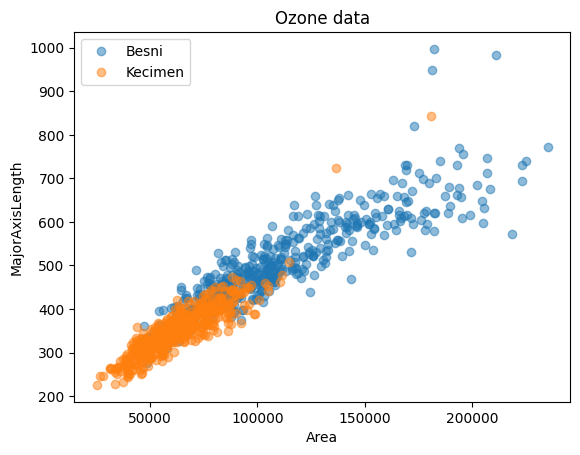

In [28]:
# from ex 2_1_2

i = 0
j = 1

f = plt.figure()
plt.title("Ozone data")

for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(X[class_mask, i], X[class_mask, j], "o", alpha=0.5)

plt.legend(classNames)
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])
plt.show()

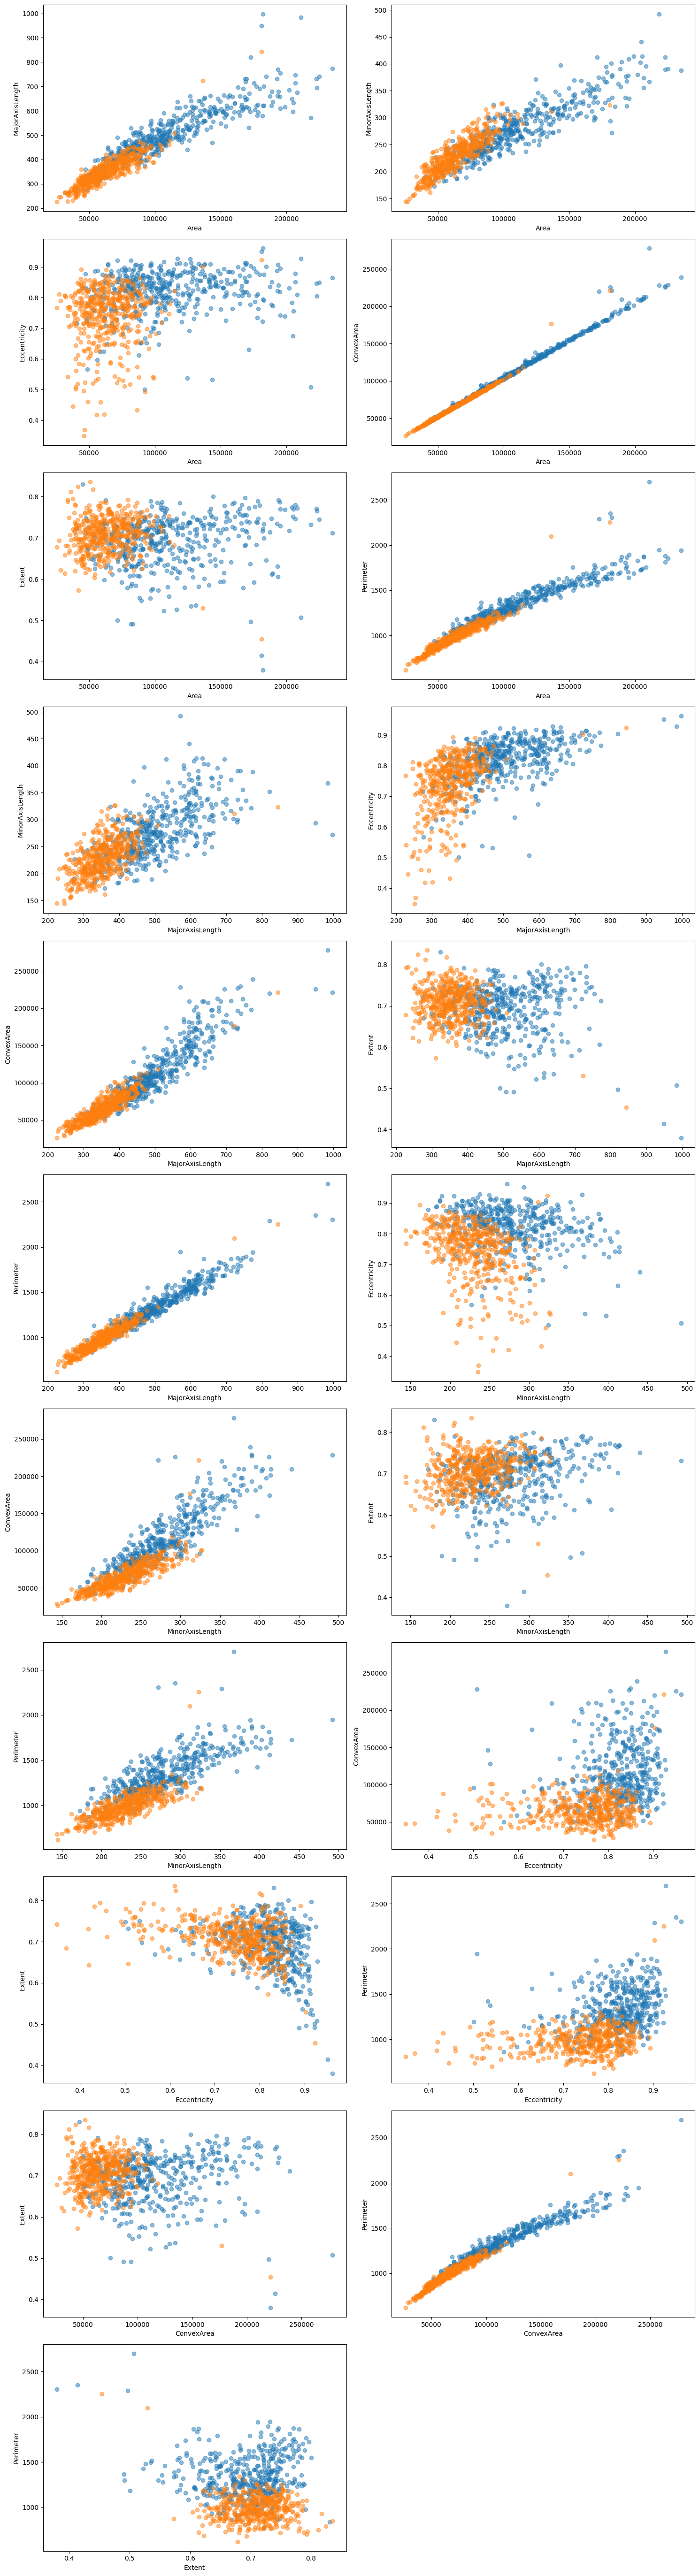

In [69]:
# all combinations

cols = range(0, 7)



# Calculate the number of combinations
num_combinations = len(cols) * (len(cols) - 1) // 2

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(num_combinations / 2))
num_cols = 2

# Create a figure with appropriate size
plt.figure(figsize=(15, num_rows * 5))

# Get all combinations of two elements from cols
comb = []
# Iterate over each element in cols
for i in range(len(cols)):
    # Iterate over elements following the current element to avoid repetition
    for j in range(i + 1, len(cols)):
        # Append the pair (i, j) to the combinations list
        comb.append((cols[i], cols[j]))

# Iterate over each combination of i and j
for idx, (i, j) in enumerate(comb, start=1):
    # Create a subplot for the current combination
    plt.subplot(num_rows, num_cols, idx)
    
    # Title for the subplot
    #plt.title("")
    
    # Iterate over each class
    for c in range(C):
        # Select indices belonging to class c
        class_mask = y == c
        plt.plot(X[class_mask, i], X[class_mask, j], "o", alpha=0.5)
    
    # Set labels for x and y axes
    plt.xlabel(attributeNames[i])
    plt.ylabel(attributeNames[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


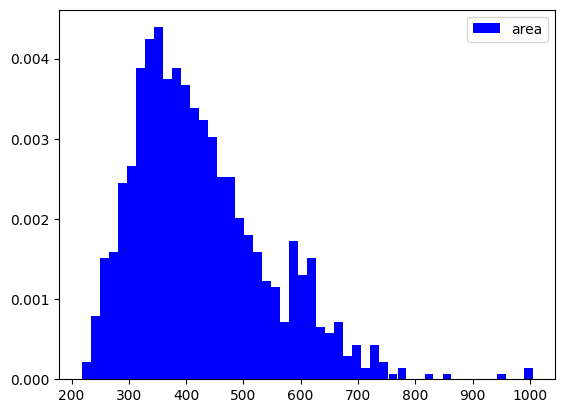

In [73]:
def plot_histogram(array_data, num, color, label):
    # plots the histogram of an array of data
    x = np.linspace(min(array_data), max(array_data), num=num)
    y = np.histogram(array_data, bins=num, density=True)
    delta = num/10000
    width_bar = (max(array_data) - min(array_data)) / num + delta
    #width_bar = (max(array_data) - min(array_data)) / num
    plt.bar(x, y[0], width=width_bar, align='center', color=color, label=label)
    area = np.sum(y[0]*(width_bar))
    area = np.sum(y[0]*(width_bar-delta))
    #print(f"area under graph = {area:.5f}")

area = X[:,1]
plot_histogram(area, 50, 'b', 'area')
plt.legend()
plt.show()

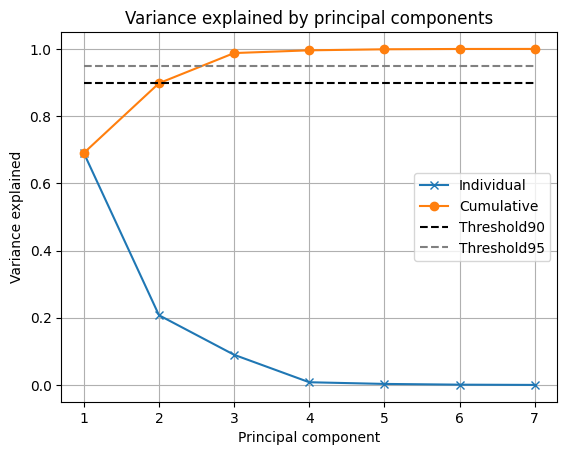

In [29]:
# from exercise 2.1.3

Y = X - np.ones((N, 1)) * X.mean(axis=0)
Y = Y * (1 / np.std(Y, 0))              # important to divide by the stanrdard deviation

U, S, Vh = svd(Y, full_matrices=False)

rho = (S * S) / (S * S).sum()

threshold = 0.9
threshold2 = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.plot([1, len(rho)], [threshold2, threshold2], color="gray", linestyle="--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold90","Threshold95"])
plt.grid()
plt.show()




6300


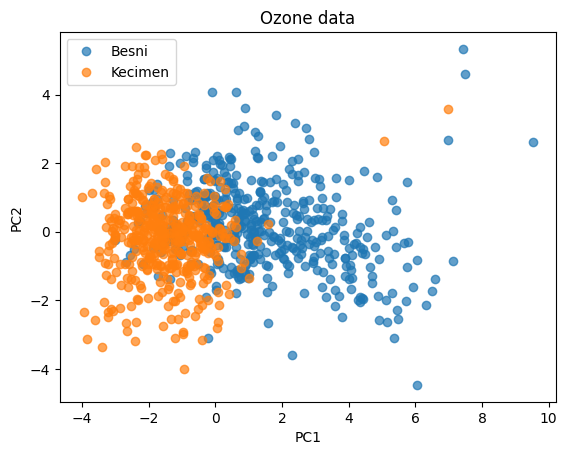

In [30]:
# from exercise 2.1.4

V = Vh.T

Z = Y @ V

i = 0
j = 1

print(Z.size)

# Plot PCA of the data
f = plt.figure()
plt.title("Ozone data")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.7)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

# Output result to screen
plt.show()



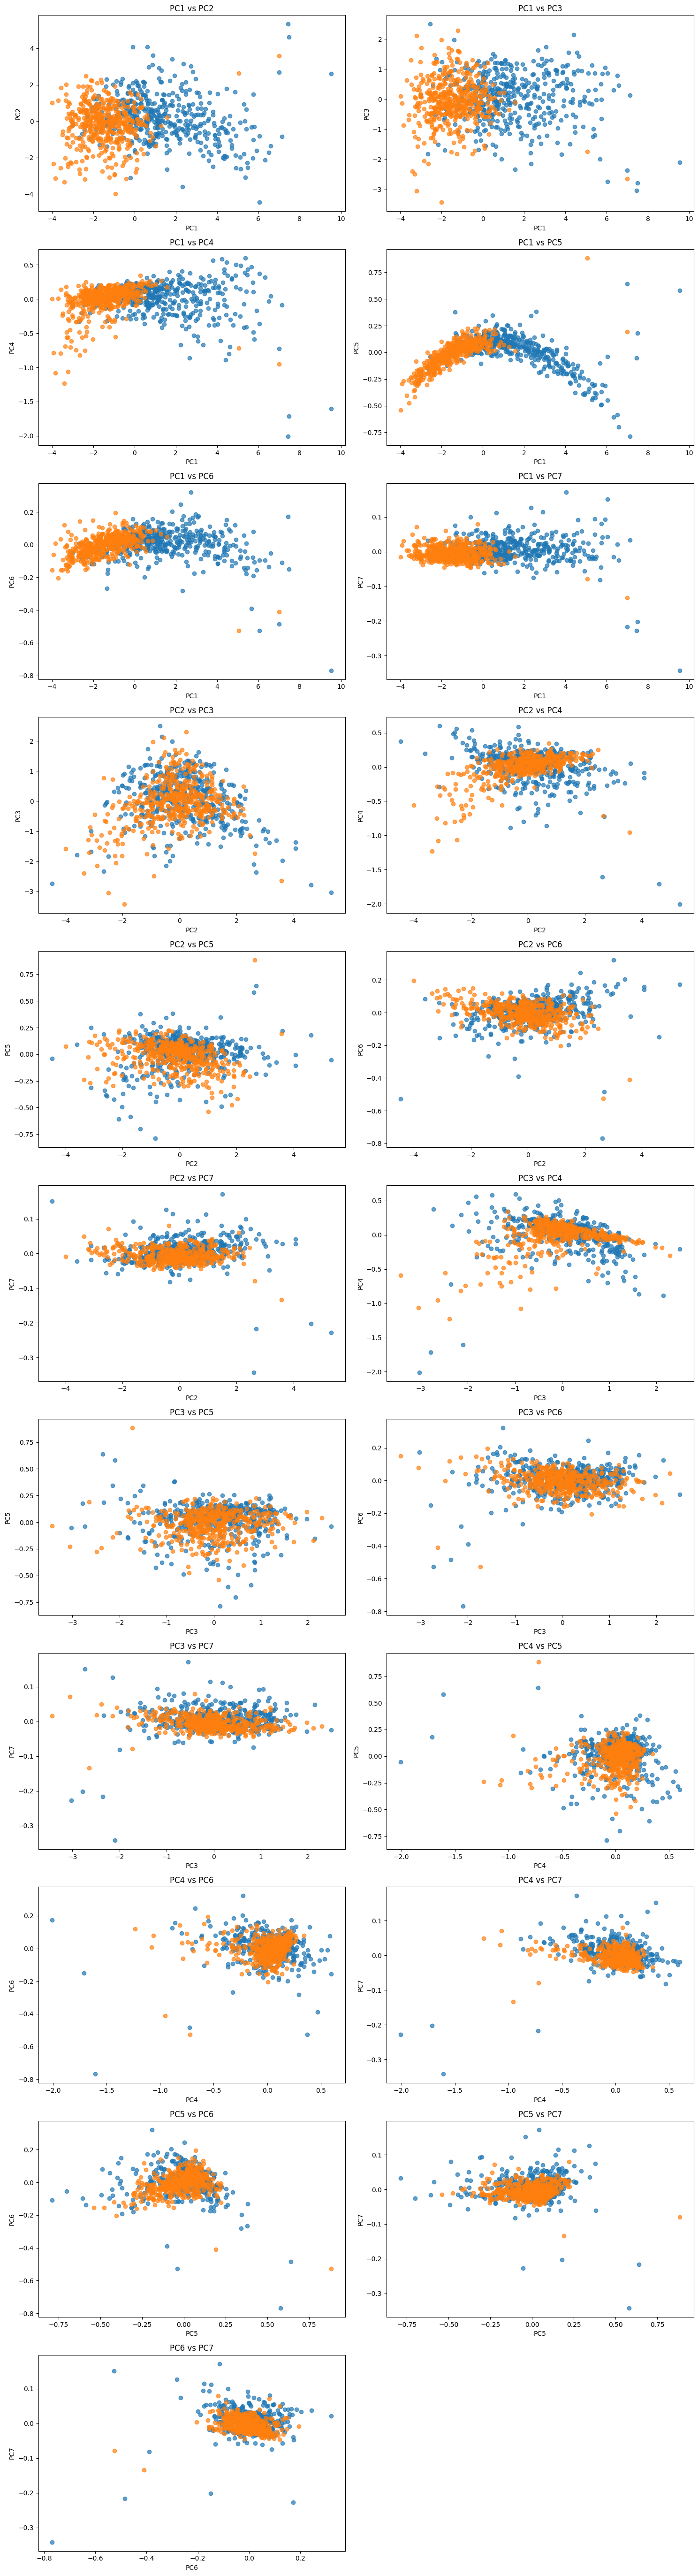

In [37]:
# all combinations

cols = range(0, 7)



# Calculate the number of combinations
num_combinations = len(cols) * (len(cols) - 1) // 2

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(num_combinations / 2))
num_cols = 2

# Create a figure with appropriate size
plt.figure(figsize=(15, num_rows * 5))

# Get all combinations of two elements from cols
comb = []
# Iterate over each element in cols
for i in range(len(cols)):
    # Iterate over elements following the current element to avoid repetition
    for j in range(i + 1, len(cols)):
        # Append the pair (i, j) to the combinations list
        comb.append((cols[i], cols[j]))

# Iterate over each combination of i and j
for idx, (i, j) in enumerate(comb, start=1):
    # Create a subplot for the current combination
    plt.subplot(num_rows, num_cols, idx)
    
    # Title for the subplot
    plt.title("PC{} vs PC{}".format(i + 1, j + 1))
    
    # Iterate over each class
    for c in range(C):
        # Select indices belonging to class c
        class_mask = y == c
        plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.7)
    
    # Set labels for x and y axes
    plt.xlabel("PC{}".format(i + 1))
    plt.ylabel("PC{}".format(j + 1))

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


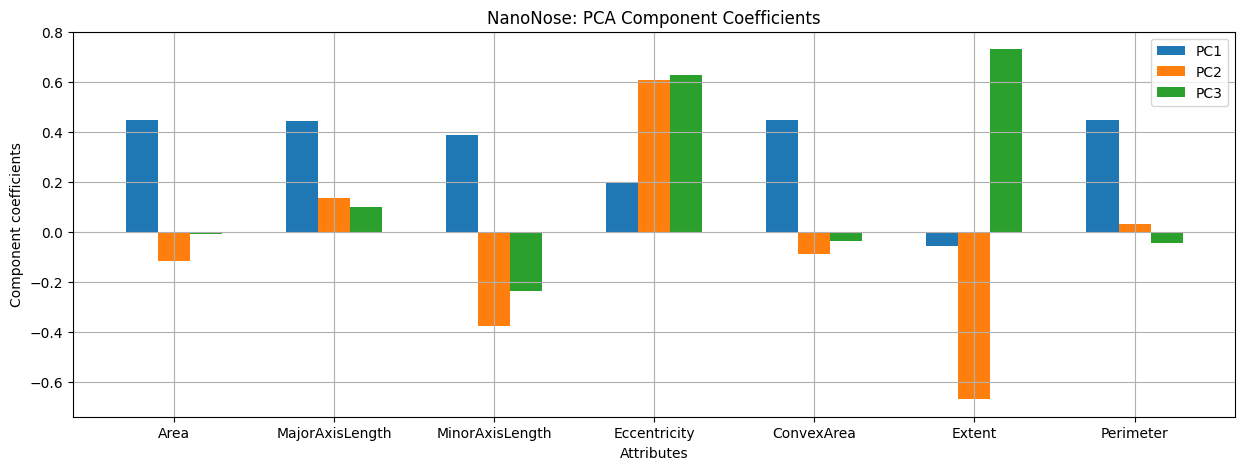

PC2:
Area [-0.11609991]
MajorAxisLength [0.13658724]
MinorAxisLength [-0.37492246]
Eccentricity [0.61082321]
ConvexArea [-0.08761633]
Extent [-0.66734439]
Perimeter [0.03417227]



In [43]:
# from exercise 2.2.4

pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
r = np.arange(1, M + 1)

plt.figure(1, figsize=(15,5))
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("NanoNose: PCA Component Coefficients")
plt.show()

index = 1
print(f"PC{index+1}:")
for i in range(len(attributeNames)):
    print(attributeNames[i], V[[i], index])
print('')




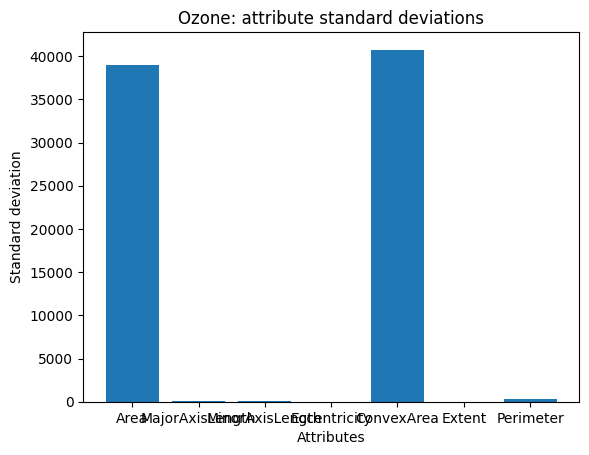

In [33]:
# from ex 2_1_6

r = np.arange(1, X.shape[1] + 1)
plt.bar(r, np.std(X, 0))
plt.xticks(r, attributeNames)
plt.ylabel("Standard deviation")
plt.xlabel("Attributes")
plt.title("Ozone: attribute standard deviations")
plt.show()

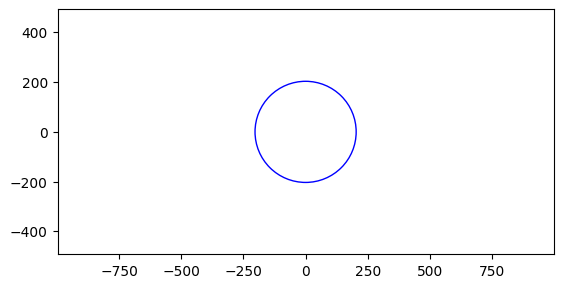

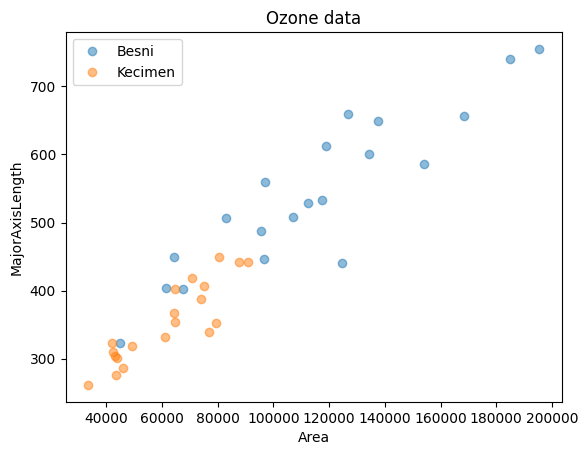

In [68]:
# draw ellipse

max_major = np.max(X[:,1])
max_minor = np.max(X[:,2])
num = 20


major_axis = X[1,1]
minor_axis = X[1,1]

fig, ax = plt.subplots()
ellipse = Ellipse(xy=(0, 0), width=major_axis, height=minor_axis, edgecolor='b', fc='None')
ax.add_patch(ellipse)
ax.set_aspect('equal')
ax.set_xlim(-max_major, max_major)
ax.set_ylim(-max_minor, max_minor)
plt.show()


i = 0
j = 1

plt.figure(1)
plt.title("Ozone data")

for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(X[class_mask][:num, i], X[class_mask][:num, j], "o", alpha=0.5)

plt.legend(classNames)
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])
plt.show()


